In [520]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h1> Algoritmo de ordenamiento MergeSort </h1>

In [521]:
def mergesort(lista):

    if len(lista) < 2:
        return lista

    limite = len(lista)/2

    izquierda = mergesort(lista[:int(limite)])
    derecha = mergesort(lista[int(limite):])

    return merge(izquierda, derecha)

def merge(izquierda, derecha):
    i = 0
    j = 0

    lista = []

    while (i < len(izquierda) and j < len(derecha)):
        if(izquierda[i] < derecha[j]):
            lista.append(izquierda[i])
            i += 1
        else:
            lista.append(derecha[j])
            j += 1
            
    lista += izquierda[i:]
    lista += derecha[j:]

    return lista

In [522]:
A = [10,5,4,6,22,8,98,1]
A = mergesort(A)
print A

[1, 4, 5, 6, 8, 10, 22, 98]


<h2> Correctitud </h2>

Se verifica que la lista creada al mezclar dos listas más pequeñas corresponda a la lista que se dividió originalmente de forma ordenada.

In [523]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    print "Comparando ", A," con ", original_A
    return l1 == l2

In [524]:
def correctitud_mergesort(lista):
    original = list(lista)
    if len(lista) < 2:
        return lista

    limite = len(lista)/2

    izquierda = correctitud_mergesort(lista[:int(limite)])
    derecha = correctitud_mergesort(lista[int(limite):])

    return correctitud_merge(izquierda, derecha, original)

def correctitud_merge(izquierda, derecha, original):
    i = 0
    j = 0
    lista = []
    
    while (i < len(izquierda) and j < len(derecha)):
        if(izquierda[i] < derecha[j]):
            lista.append(izquierda[i])
            i += 1
        else:
            lista.append(derecha[j])
            j += 1
            
    lista += izquierda[i:]
    lista += derecha[j:]
    
    print invariant(lista, original)

    return lista

In [525]:
A = [10,5,4,6,22,8,98,1]
A = correctitud_mergesort(A)
print A

Comparando  [5, 10]  con  [10, 5]
True
Comparando  [4, 6]  con  [4, 6]
True
Comparando  [4, 5, 6, 10]  con  [10, 5, 4, 6]
True
Comparando  [8, 22]  con  [22, 8]
True
Comparando  [1, 98]  con  [98, 1]
True
Comparando  [1, 8, 22, 98]  con  [22, 8, 98, 1]
True
Comparando  [1, 4, 5, 6, 8, 10, 22, 98]  con  [10, 5, 4, 6, 22, 8, 98, 1]
True
[1, 4, 5, 6, 8, 10, 22, 98]


<h3> Número de operaciones </h3>

In [526]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_mergesort(lista, acct):

    if len(lista) < 2: 
        acct.count()
        return lista;

    limite = len(lista)/2; acct.count()

    izquierda = acct_mergesort(lista[:int(limite)], acct);
    derecha = acct_mergesort(lista[int(limite):], acct);

    return acct_merge(izquierda, derecha, acct)

def acct_merge(izquierda, derecha, acct):
    i = 0; acct.count()
    j = 0; acct.count()

    lista = []; 
    acct.count()
    while (i < len(izquierda) and j < len(derecha)):
        if(izquierda[i] < derecha[j]):
            lista.append(izquierda[i])
            i += 1
            acct.count()
        else:
            lista.append(derecha[j])
            j += 1
            acct.count()
            
    lista += izquierda[i:]; acct.count()
    lista += derecha[j:]; acct.count()

    return lista

In [527]:
A = [10,5,4,6,22,8,98,1]
acct = Counter()
A = acct_mergesort(A, acct)
print A
acct.print_steps();

[1, 4, 5, 6, 8, 10, 22, 98]
Number of steps = 66


<h2> Análisis experimental </h2>

Se calcula el número de operaciones que realiza el algoritmo al ordenar listas de tamaño 1 hasta n.

In [528]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_mergesort(l, acct)
        results.append(acct.steps)
    return results

In [529]:
print exper_analysis(10)

[1, 1, 9, 18, 27, 37, 47, 57, 67, 76]


<h2> Análisis teórico </h2>

Se calcula el número de operaciones al ordenar listas de tamaño 1 hasta n de forma teórica teniendo en cuenta que el algoritmo Merge es de orden O(n * log2 n).

In [530]:
import random as rnd
import math

def teoric_analysis(n):
    results = []
    for i in range(n):
        if(i == 0):
            l = 0
        else:
            l = i*np.log2(i)
        results.append(l)
    return results

In [531]:
print teoric_analysis(10)

[0, 0.0, 2.0, 4.7548875021634682, 8.0, 11.60964047443681, 15.509775004326936, 19.651484454403228, 24.0, 28.529325012980809]


<h2> Análisis de tiempo de ejecución </h2>

Se calcula el tiempo de ejecución que tarda el algoritmo ordenando listas de tamaño 1 hasta n.

In [532]:
import time

def time_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        mergesort(l)
        toc = time.clock()#get final time
        results.append((toc-tic)*1000000)
    return results

In [533]:
print time_analysis(10)

[4.000000000559112, 2.0000000020559128, 9.999999999621423, 11.00000000064938, 15.999999998683734, 23.000000002326715, 28.00000000036107, 32.00000000092018, 35.00000000045134, 43.9999999990448]


<h2> Comparación </h2>

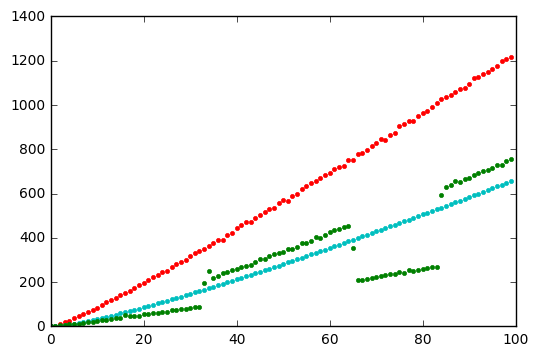

In [534]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.', color ='r')
z = np.array(teoric_analysis(100))
pl.plot(x, z, 'k.', color='c')
w = np.array(time_analysis(100))
pl.plot(x, w, 'k.', color='g')